<a href="https://colab.research.google.com/github/pallavi-thakre/Codesoft/blob/main/IRIS_FLOWER_CLASSIFICATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 1 - IRIS FLOWER CLASSIFICATION

CODSOFT INTERNSHIP

TASK 3: IRIS FLOWER CLASSIFICATION

AUTHOR: Pallavi Thakre

DOMAIN : Data Science

### Objective:

### The Iris dataset is a widely recognized and classic dataset in the realm of machine learning. It contains data on three distinct species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Frequently utilized for tasks like classification, pattern recognition, and data visualization, this dataset serves as a common benchmark in the field.

### *The dataset contains the following attributes for each flower specimen:*

1.Sepal length in centimeters

2.Sepal width in centimeters


3.Petal length in centimeters


4.Petal width in centimeters


###These characteristics act as features that play a crucial role in distinguishing among the three Iris species. The Iris dataset is frequently employed as a foundational illustration when introducing key concepts like data preprocessing, exploratory data analysis, and classification algorithms in machine learning.*

### *Based on these four features, the goal is to classify each flower into one of the three species. The dataset is balanced, meaning there is an equal number of samples for each species

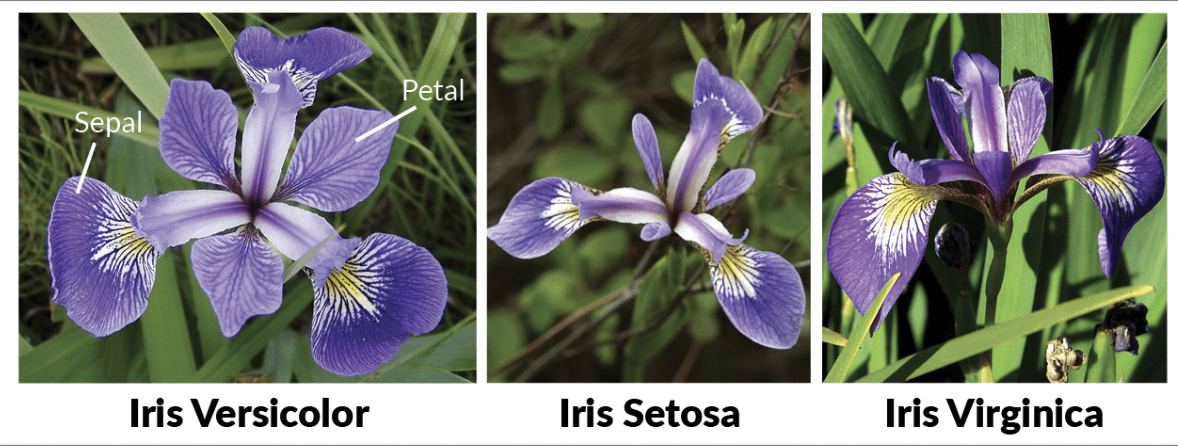

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# load the data from csv file to Pandas DataFrame
iris =pd.read_csv("/content/IRIS.csv")

In [ ]:
# printing first 5 rows of the DataFrame
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# printing Last 5 rows of the DataFrame
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# number of rows and columns
iris.shape

(150, 5)

In [ ]:
# getting some information about Data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# check the missing values in each column
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### This dataset contains no null values ie all the columns have values.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Visualizing the whole data set

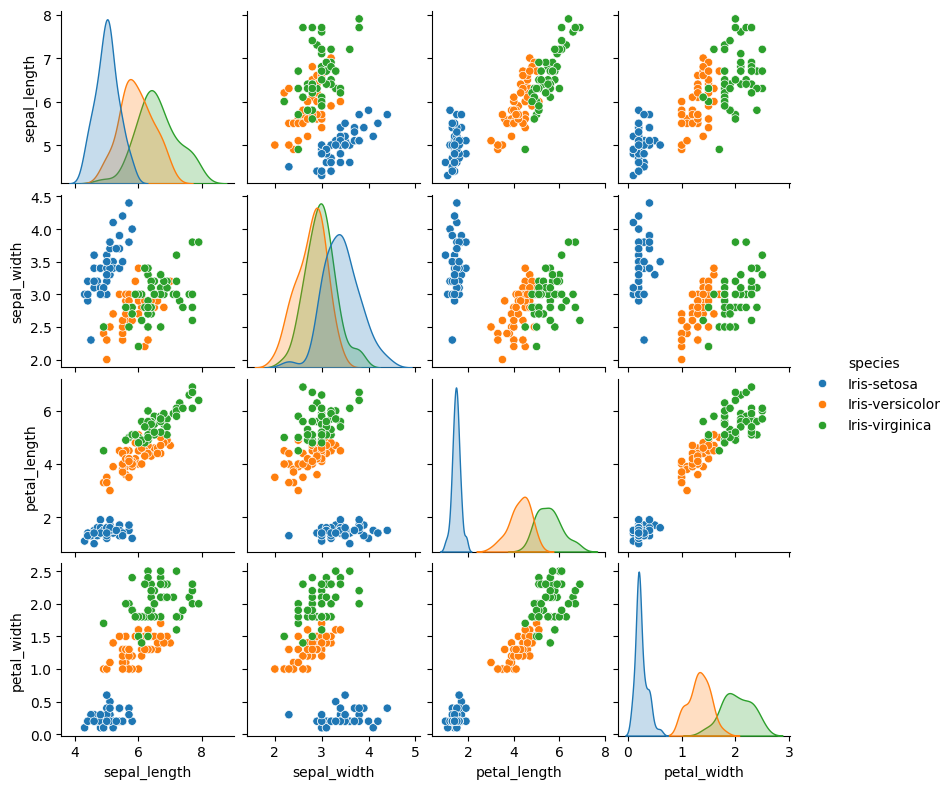

In [ ]:
sns.pairplot(iris, hue = 'species', height=2)

### This Visualization helps in observing that 'Iris-setosa' can easily be differentiated from the other two species.

## Splitting the Data and Target

In [ ]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]
Y = iris[['species']]

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

### MODEL 1: Support Vector Machine Algorithm

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
model_svc = SVC(kernel='linear', C=1)

# Train the classifier
model_svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_svc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [ ]:
prediction1 = model_svc.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print(f"The accuracy score of SVM model: {accuracy_score(y_test, prediction1)*100}")


The accuracy score of SVM model: 96.66666666666667


### MODEL 2: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_mod = LogisticRegression()
log_reg_mod.fit(X_train, y_train)

LogisticRegression()

In [ ]:
result2 = log_reg_mod.predict(X_test)

In [ ]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
print(f"The accuracy score of Logistic Regression model: {accuracy_score(y_test, result2)*100}")

The accuracy score of Logistic Regression model: 100.0


### MODEL 3: Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction3 = model_DTC.predict(X_test)

In [ ]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
print(f"The accuracy score of Decision Tree Classifier model: {accuracy_score(y_test, prediction3)*100}")

The accuracy score of Decision Tree Classifier model: 100.0


## Insights and Concluison:



* The Logistic Regression and Decision Tree Classifier algorithm appears to perform exceptionally well on the iris flower dataset, achieving a perfect accuracy.*

* The SVM algorithm, with its 96% accuracy, offer reliable alternative with a good balance between performance and interpretability*